# CEWA 568 Snow Hydrology - Spring 2023
## Lab 2-3: Kettle Ponds snow pillow and snow depth (from lidar) precipitation.

Written by Eli Schwat (elilouis@uw.edu) - December 2024.

## Library imports

In [1]:
# import libraries we'll need
import urllib
import pandas as pd
import datetime as dt
import xarray as xr
import matplotlib.pyplot as plt
import os
%matplotlib inline

## Open SoS Data

In [2]:
sos_file = "../data/sos_full_dataset_30min.nc"
sos_dataset = xr.open_dataset(sos_file)

Before plotting, we resample the SoS dataset by finding the daily mean. We don't need the 30 minute data to look at season long changes. Also, the snow pillow dataset has lots of nans so resampling makes the plot look better. The precipitaton dataset is already daily, so we don't need to resample it.

In [3]:
sos_dataset_daily = sos_dataset.resample(time="1440Min").mean()

Now we plot the data. Note that SWE_p1_c, SWE_p2_c, SWE_p3_c, SWE_p24_ corresponse to the snow pillows beneath towers UW, UE, C, D, respectively.

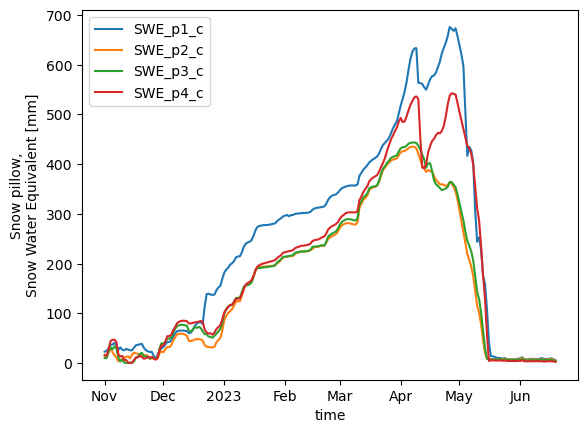

In [4]:
sos_dataset_daily['SWE_p1_c'].plot(label='SWE_p1_c')
sos_dataset_daily['SWE_p2_c'].plot(label='SWE_p2_c')
sos_dataset_daily['SWE_p3_c'].plot(label='SWE_p3_c')
sos_dataset_daily['SWE_p4_c'].plot(label='SWE_p4_c')
plt.legend()
plt.ylabel("Snow pillow,\nSnow Water Equivalent [mm]")
plt.show()

We have snow depth measurements from two towers - towers C and D. 

This corresponds to snow pillows p3 and p4, i.e. the variable `SnowDepth_c` corresponds to the measurements of snow depth over the snow pillow variable `SWE_p3_c` and the variable `SnowDepth_d` corresponds to the measurements of snow depth over the snow pillow variable `SWE_p4_c`.

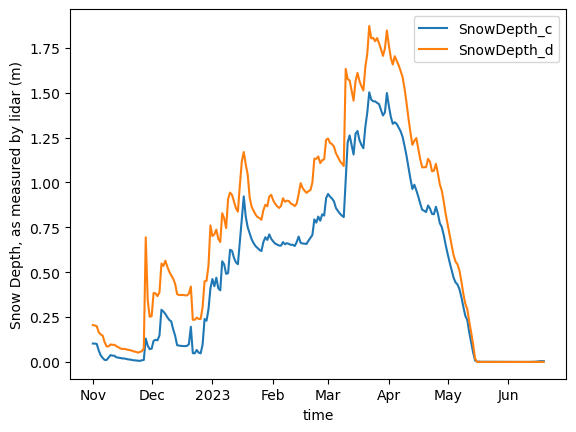

In [5]:
sos_dataset_daily['SnowDepth_c'].plot(label='SnowDepth_c')
sos_dataset_daily['SnowDepth_d'].plot(label='SnowDepth_d')
plt.legend()
plt.ylabel("Snow Depth, as measured by lidar (m)")
plt.show()

# Calculate snow density

We can calculate snow density (kg/$m^3$) by dividing SWE (in mm of water) by the snow depth (in $m$). 

How does this conversion work? 

Consider that SWE is measuring the depth of water. Consider that depth of water over a 1x1 $m^2$ area, which gives us a volume of water. The density of water (approximately 1000 kg/m^3) gives us the weight of the water in the 1x1 $m^2$ area. Using the snow depth, we know the volume of snow over that area, which allows us to estimate the snow density.


$$\frac{\text{SWE}_{[m]} * (1*1)_{[m^2]} * WATERDENSITY_{[kg \space m^{-3}]}}{SNOWDEPTH_{[m]} * (1*1)_{[m^2]}} = SNOWDENSITY_{[kg \space m^{-3}]} $$

Because the units are complicated here, I personally would use some python code to ensure my units are correct here. Using this feature allows me to ignore the differences in units between SWE (in our dataset as mm) and snow depth (in our dataset as m). Look up the `pint` and `metpy.units` python packages if you are interested in learning more about this functionality. I give a demo below.

In [6]:
# !pip install metpy
!pip install pint_xarray

In [7]:
from metpy.units import units
from metpy.constants import density_water
import pint_xarray
density_water

<Quantity(999.97495, 'kilogram / meter ** 3')>

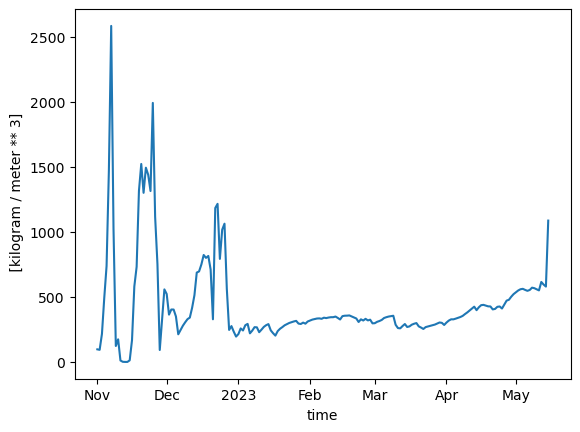

In [8]:
snowdensity_c = (
    sos_dataset_daily['SWE_p3_c']*units("mm")
).pint.to("m") * density_water / (
    sos_dataset_daily['SnowDepth_c'] * units("m")
)
snowdensity_c[:-35].plot()

What do we think about the high values early in the season? Are they believable? What could be causing them?